In [26]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, morphology
from aicsimageio import AICSImage, readlif

file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+MG132_CCT1_635P_HA_580_A11_460L_3.lif"
 
img = AICSImage(file_name, reconstruct_mosaic=False)
# img.dims.order  # T, C, Z, big Y, big X, (S optional)
  # Dask chunks fall on tile boundaries, pull YX chunks out of the image
print(img.dask_data)

dask.array<transpose, shape=(1, 4, 11, 1024, 1024), dtype=uint16, chunksize=(1, 1, 11, 1024, 1024), chunktype=numpy.ndarray>


In [27]:
c0 = img.get_image_data('ZYX', C=0)
c1 = img.get_image_data('ZYX', C=1)
c2 = img.get_image_data('ZYX', C=2)
c3 = img.get_image_data('ZYX', C=3)
print(f"Z-dimensiyonu : {c0.shape}")
print(f"Z-dimensiyonu : {c1.shape}")
print(f"Z-dimensiyonu : {c2.shape}")
print(f"Z-dimensiyonu : {c3.shape}")

Z-dimensiyonu : (11, 1024, 1024)
Z-dimensiyonu : (11, 1024, 1024)
Z-dimensiyonu : (11, 1024, 1024)
Z-dimensiyonu : (11, 1024, 1024)


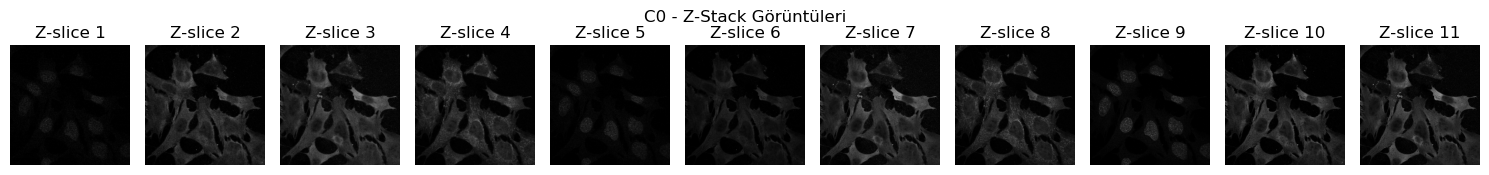

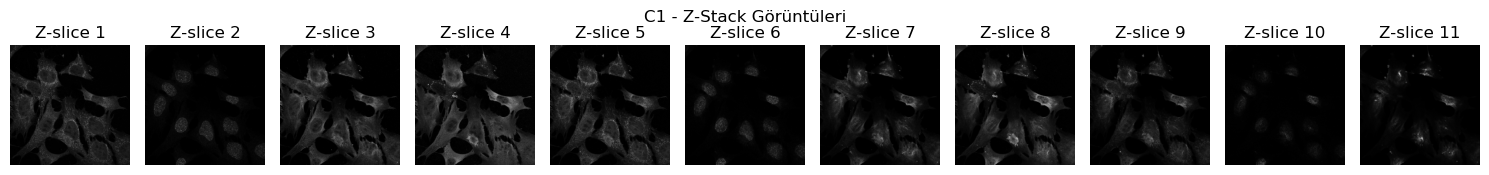

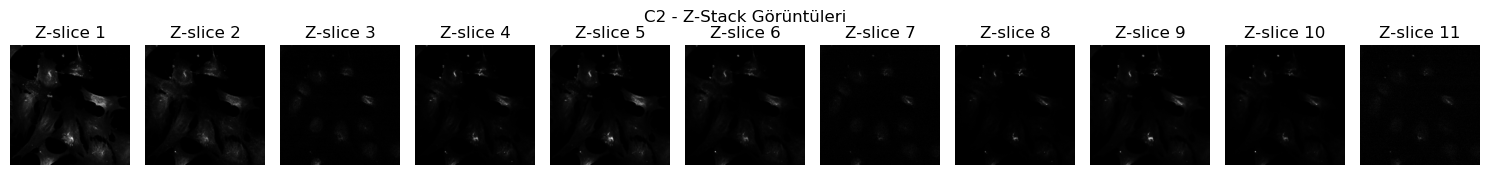

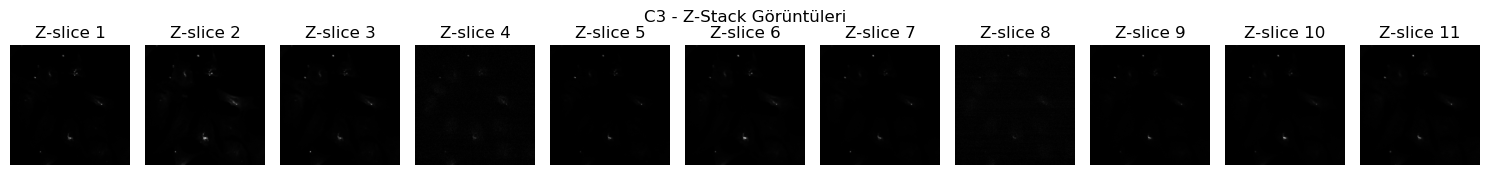

In [31]:
import matplotlib.pyplot as plt

# Z-slice'ları çizdirmek
def plot_z_slices(channel_data, channel_name):
    num_z_slices = channel_data.shape[0]  # Z-slice sayısı
    fig, axes = plt.subplots(1, num_z_slices, figsize=(15, 2))
    axes = axes.ravel()

    for z in range(num_z_slices):
        axes[z].imshow(channel_data[z], cmap='gray')
        axes[z].set_title(f"Z-slice {z+1}")
        axes[z].axis('off')

    plt.tight_layout()
    plt.suptitle(f"{channel_name} - Z-Stack Görüntüleri")
    plt.show()

# C0, C1, C2 ve C3 kanallarını çizdir
plot_z_slices(c0, "C0")
plot_z_slices(c1, "C1")
plot_z_slices(c2, "C2")
plot_z_slices(c3, "C3")


In [ ]:
reader = LifReader("ver-large-mosaic.lif")
reader.dims.order  # M, T, C, Z, tile size Y, tile size X, (S optional)
reader.dask_data  # normal operations, can use M dimension to select individual tiles
reader.mosaic_dask_data  # returns stitched mosaic - T, C, Z, big Y, big, X, (S optional)